In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(1, '/home/jw3514/Work/ASD_Circuits/src')
from ASD_Circuits import *
from tabulate import tabulate
#from brokenaxes import brokenaxes
import zipfile
import multiprocessing
HGNC, ENSID2Entrez, GeneSymbol2Entrez, Entrez2Symbol, allen_mouse_genes = LoadGeneINFO()

/home/jw3514/anaconda3/lib/python3.9/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
ASD_DF = pd.read_csv("../dat/Unionize_bias/Spark_Meta_EWS.Z2.bias.FDR.csv", index_col="STR")
Sib_DF = pd.read_csv("../dat/Unionize_bias/sib.top61.Z2.csv", index_col="STR")
Control_DIR = "../dat/Unionize_bias/SubSampleSib/"

In [3]:
InfoMat = pd.read_csv("../dat/allen-mouse-conn/ScoreingMat_jw_v3/InfoMat.Ipsi.csv", index_col=0)
InfoMatShort = pd.read_csv("../dat/allen-mouse-conn/ScoreingMat_jw_v3/InfoMat.Ipsi.Short.3900.csv", index_col=0)
InfoMatLong = pd.read_csv("../dat/allen-mouse-conn/ScoreingMat_jw_v3/InfoMat.Ipsi.Long.3900.csv", index_col=0)

# Q values converting

In [4]:
topNs = np.arange(200, 5, -1)
DIR = "/home/jw3514/Work/ASD_Circuits/scripts"
ASD_SI = np.load("{}/RankScores/RankScore.Ipsi.ASD.npy".format(DIR))
Cont_SI = np.load("{}/RankScores/RankScore.Ipsi.Cont.npy".format(DIR))

ASD_SI_Short = np.load("{}/RankScores/RankScore.Ipsi.Short.3900.ASD.npy".format(DIR))
Cont_SI_Short = np.load("{}/RankScores/RankScore.Ipsi.Short.3900.Cont.npy".format(DIR))

ASD_SI_Long = np.load("{}/RankScores/RankScore.Ipsi.Long.3900.ASD.npy".format(DIR))
Cont_SI_Long = np.load("{}/RankScores/RankScore.Ipsi.Long.3900.Cont.npy".format(DIR))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot: >

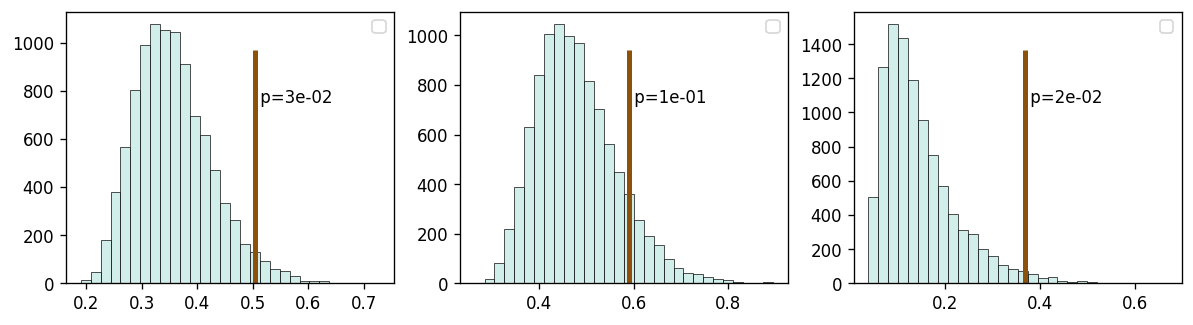

In [5]:
idx = np.where(topNs==46)[0][0]
#print(idx)
fig, axs = plt.subplots(1, 3, dpi=120, figsize=(12,3))
PlotPermutationP(Cont_SI[:, idx], ASD_SI[idx], axs[0])
PlotPermutationP(Cont_SI_Short[:, idx], ASD_SI_Short[idx], axs[1])
PlotPermutationP(Cont_SI_Long[:, idx], ASD_SI_Long[idx], axs[2])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot: >

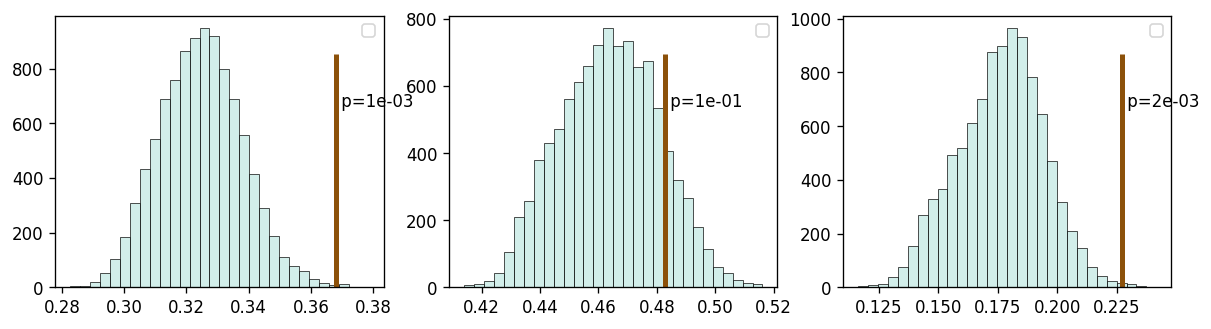

In [55]:
idx = np.where(topNs==175)[0][0]
#print(idx)
fig, axs = plt.subplots(1, 3, dpi=120, figsize=(12,3))
PlotPermutationP(Cont_SI[:, idx], ASD_SI[idx], axs[0])
PlotPermutationP(Cont_SI_Short[:, idx], ASD_SI_Short[idx], axs[1])
PlotPermutationP(Cont_SI_Long[:, idx], ASD_SI_Long[idx], axs[2])

In [22]:
Cont_SI.shape

(10000, 195)

In [12]:
idx1 = np.where(topNs==10)[0][0]
idx2 = np.where(topNs==121)[0][0]
print(idx1, idx2)

190 79


In [16]:
ASD_SI[idx2:idx1].mean()

0.44769657123679507

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot: >

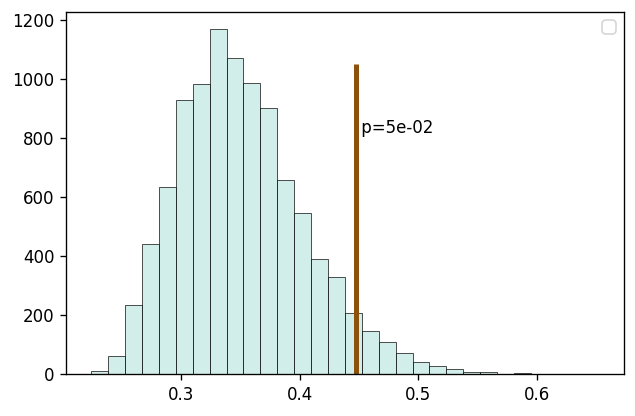

In [35]:
x = ASD_SI[idx2:idx1].mean()
xx = Cont_SI[:, idx2:idx1].mean(axis=1)

fig, ax = plt.subplots(dpi=120)
PlotPermutationP(xx, x, ax)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot: >

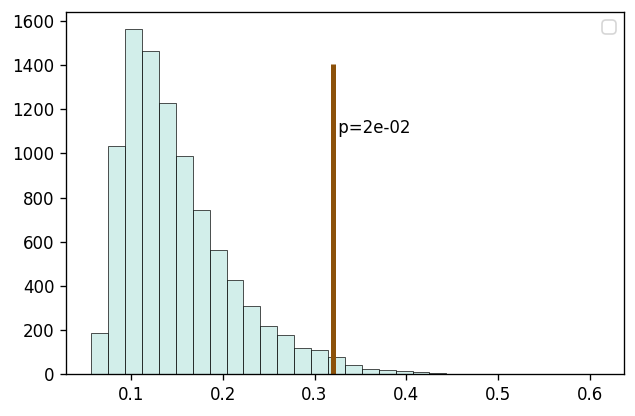

In [36]:
x = ASD_SI_Long[idx2:idx1].mean()
xx = Cont_SI_Long[:, idx2:idx1].mean(axis=1)

fig, ax = plt.subplots(dpi=120)
PlotPermutationP(xx, x, ax)

In [59]:
asd_pvalues = np.array([GetPermutationP(Cont_SI[:, i], ASD_SI[i])[1] for i in range(
        ASD_SI.shape[0])])

1.3010299956639813


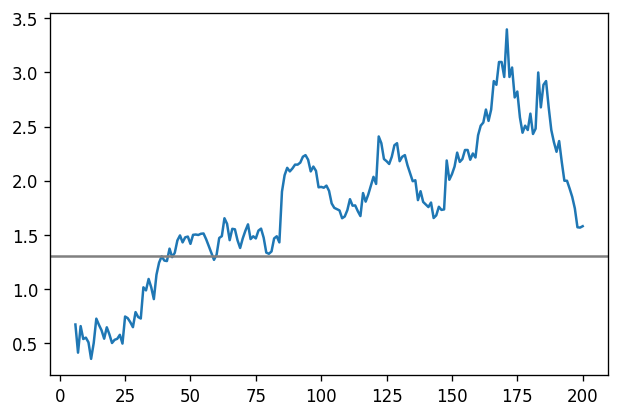

In [60]:
fig, ax = plt.subplots(dpi=120)
ax.plot(topNs, -np.log10(asd_pvalues))
ax.axhline(y=-np.log10(0.05), color="grey")
print(-np.log10(0.05))

1.3010299956639813


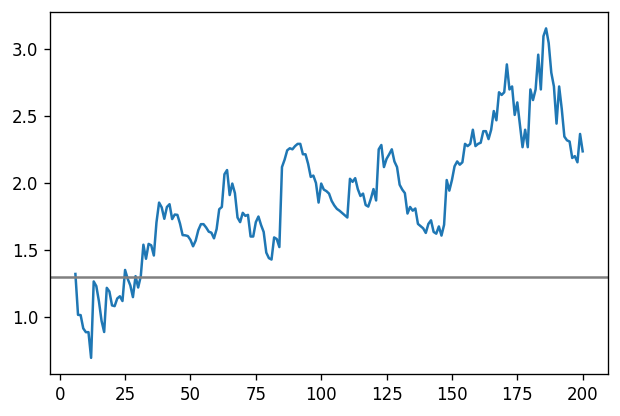

In [58]:

asd_pvalues = np.array([GetPermutationP(Cont_SI_Long[:, i], ASD_SI_Long[i])[1] for i in range(
        ASD_SI_Long.shape[0])])
fig, ax = plt.subplots(dpi=120)
ax.plot(topNs, -np.log10(asd_pvalues))
ax.axhline(y=-np.log10(0.05), color="grey")
print(-np.log10(0.05))

In [8]:
np.where(topNs==5)

(array([], dtype=int64),)

In [6]:
def QvalueConverting(dist):
    pvalues = np.array([GetPermutationP(dist, x)[1] for x in dist])
    qvalues = -np.log10(pvalues)
    return qvalues
# def driver_func():
#     PROCESSES=10
#     with multiprocessing.Pool(PROCESSES) as pool:
#         parames = []

In [12]:
ScoreMatDir="/home/jw3514/Work/ASD_Circuits/dat/allen-mouse-conn/ScoreingMat_jw_v3/"
IpsiInfoMat=pd.read_csv(ScoreMatDir + "InfoMat.Ipsi.csv", index_col=0)
IpsiInfoMatShort_v1=pd.read_csv(ScoreMatDir + "InfoMat.Ipsi.Short.3900.csv", index_col=0)
IpsiInfoMatLong_v1=pd.read_csv(ScoreMatDir + "InfoMat.Ipsi.Long.3900.csv", index_col=0)
STR_Ranks = Sib_DF.index.values
#STR_Ranks = ASD_Bias.index.values
topNs = list(range(200, 5, -1))
sib_topN_score = []
sib_topN_scoreShort = []
sib_topN_scoreLong = []
for topN in topNs:
    top_strs = STR_Ranks[:topN]
    score = ScoreCircuit_SI_Joint(top_strs, IpsiInfoMat)
    scoreShort = ScoreCircuit_SI_Joint(top_strs, IpsiInfoMatShort_v1)
    scoreLong = ScoreCircuit_SI_Joint(top_strs, IpsiInfoMatLong_v1)
    sib_topN_score.append(score)
    sib_topN_scoreShort.append(scoreShort)
    sib_topN_scoreLong.append(scoreLong)
sib_topN_score = np.array(sib_topN_score)
sib_topN_scoreShort = np.array(sib_topN_scoreShort)
sib_topN_scoreLong = np.array(sib_topN_scoreLong)

/home/jw3514/Work/ASD_Circuits/src/ASD_Circuits.py:2776: RuntimeWarning: invalid value encountered in double_scalars
  return score/N_events
/home/jw3514/Work/ASD_Circuits/src/ASD_Circuits.py:2776: RuntimeWarning: invalid value encountered in double_scalars
  return score/N_events
/home/jw3514/Work/ASD_Circuits/src/ASD_Circuits.py:2776: RuntimeWarning: invalid value encountered in double_scalars
  return score/N_events


In [13]:
sib_topN_scoreLong[-1] = sib_topN_scoreLong[-4]
sib_topN_scoreLong[-2] = sib_topN_scoreLong[-4]
sib_topN_scoreLong[-3] = sib_topN_scoreLong[-4]

In [14]:
asd_pvalues = np.array([GetPermutationP(Cont_SI[:, i], ASD_SI[i])[1] for i in range(
        ASD_SI.shape[0])])
sib_pvalues = np.array([GetPermutationP(Cont_SI[:, i], sib_topN_score[i])[1] for i in range(
        sib_topN_score.shape[0])])

In [15]:
asd_mean_q = np.mean(-np.log10(asd_pvalues))
sib_mean_q = np.mean(-np.log10(sib_pvalues))

In [17]:
Cont_P = []
for profile in Cont_SI:
    pvalues = np.array([GetPermutationP(Cont_SI[:, i], profile[i])[1] for i in range(
        profile.shape[0])])
    Cont_P.append(pvalues)
Cont_P = np.array(Cont_P)

In [18]:
subsib_mean_q = []
for pvalues in Cont_P:
    mean_q = np.mean(-np.log10(pvalues))
    subsib_mean_q.append(mean_q)
subsib_mean_q = np.array(subsib_mean_q)

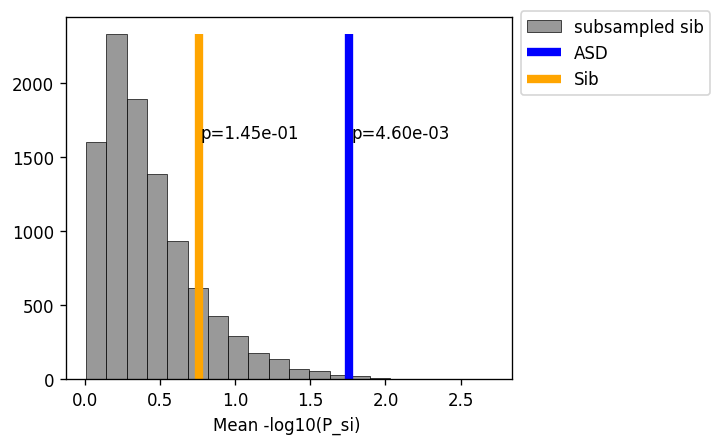

In [19]:
fig, ax = plt.subplots(dpi=120)
n, bins, patches = ax.hist(subsib_mean_q, bins=20, histtype = "barstacked", align="mid", 
                          facecolor="grey", alpha=0.8, label="subsampled sib", edgecolor="black", 
                          linewidth=0.5)
Z1, P1 = GetPermutationP(subsib_mean_q, asd_mean_q)
Z2, P2 = GetPermutationP(subsib_mean_q, sib_mean_q)
ax.vlines(asd_mean_q, ymin=0, ymax = max(n), linewidth = 5, color="blue", label="ASD")
ax.vlines(sib_mean_q, ymin=0, ymax = max(n), linewidth = 5, color="orange", label="Sib")
ax.text(x=asd_mean_q*1.01, y=max(n)*0.7, s = "p=%.2e"%P1)
ax.text(x=sib_mean_q*1.01, y=max(n)*0.7, s = "p=%.2e"%P2)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc="center left", bbox_to_anchor=(1, 0.9))
ax.set_xlabel("Mean -log10(P_si) ")
plt.show()

In [27]:
Cont_P_short = []
for profile in Cont_SI_Short[:1000]:
    pvalues = np.array([GetPermutationP(Cont_SI_Short[:, i], profile[i])[1] for i in range(
        profile.shape[0])])
    Cont_P_short.append(pvalues)
Cont_P_short = np.array(Cont_P_short)

In [28]:
Cont_P_long = []
for profile in Cont_SI_Long:
    pvalues = np.array([GetPermutationP(Cont_SI_Long[:, i], profile[i])[1] for i in range(
        profile.shape[0])])
    Cont_P_long.append(pvalues)
Cont_P_long = np.array(Cont_P_long)

In [29]:
asd_pvalues_short = np.array([GetPermutationP(Cont_SI_Short[:, i], ASD_SI_Short[i])[1] for i in range(
        ASD_SI_Short.shape[0])])
sib_pvalues_short = np.array([GetPermutationP(Cont_SI_Short[:, i], sib_topN_scoreShort[i])[1] for i in range(
        sib_topN_scoreShort.shape[0])])
asd_mean_q_short = np.mean(-np.log10(asd_pvalues_short))
sib_mean_q_short = np.mean(-np.log10(sib_pvalues_short))

subsib_mean_q_short = []
for pvalues in Cont_P_short:
    mean_q = np.mean(-np.log10(pvalues))
    subsib_mean_q_short.append(mean_q)
subsib_mean_q_short = np.array(subsib_mean_q_short)

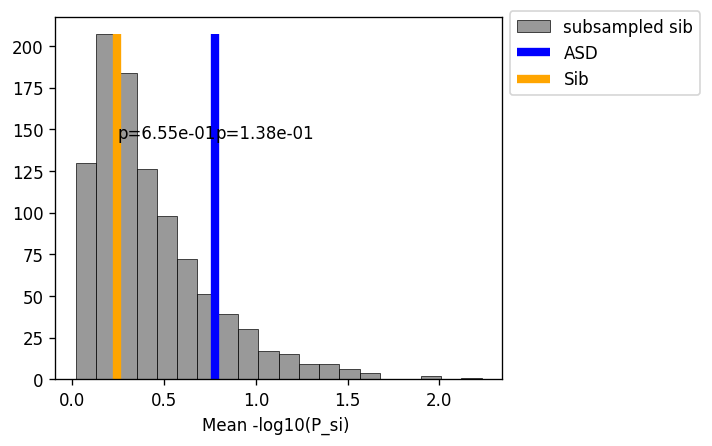

In [30]:
fig, ax = plt.subplots(dpi=120)
n, bins, patches = ax.hist(subsib_mean_q_short, bins=20, histtype = "barstacked", align="mid", 
                          facecolor="grey", alpha=0.8, label="subsampled sib", edgecolor="black", 
                          linewidth=0.5)
Z1, P1 = GetPermutationP(subsib_mean_q_short, asd_mean_q_short)
Z2, P2 = GetPermutationP(subsib_mean_q_short, sib_mean_q_short)
ax.vlines(asd_mean_q_short, ymin=0, ymax = max(n), linewidth = 5, color="blue", label="ASD")
ax.vlines(sib_mean_q_short, ymin=0, ymax = max(n), linewidth = 5, color="orange", label="Sib")
ax.text(x=asd_mean_q_short*1.01, y=max(n)*0.7, s = "p=%.2e"%P1)
ax.text(x=sib_mean_q_short*1.01, y=max(n)*0.7, s = "p=%.2e"%P2)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc="center left", bbox_to_anchor=(1, 0.9))
ax.set_xlabel("Mean -log10(P_si) ")
plt.show()

In [31]:
asd_pvalues_long = np.array([GetPermutationP(Cont_SI_Long[:, i], ASD_SI_Long[i])[1] for i in range(
        ASD_SI_Long.shape[0])])
sib_pvalues_long = np.array([GetPermutationP(Cont_SI_Long[:, i], sib_topN_scoreLong[i])[1] for i in range(
        sib_topN_scoreLong.shape[0])])
asd_mean_q_long = np.mean(-np.log10(asd_pvalues_long))
sib_mean_q_long = np.mean(-np.log10(sib_pvalues_long))

subsib_mean_q_long = []
for pvalues in Cont_P_long:
    mean_q = np.mean(-np.log10(pvalues))
    subsib_mean_q_long.append(mean_q)
subsib_mean_q_long = np.array(subsib_mean_q_long)

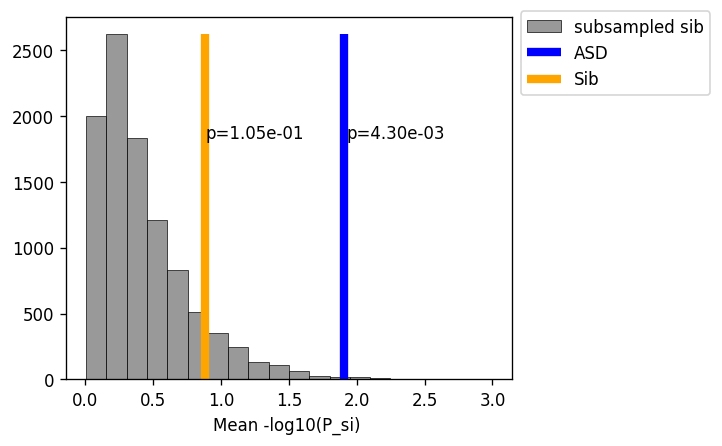

In [32]:
fig, ax = plt.subplots(dpi=120)
n, bins, patches = ax.hist(subsib_mean_q_long, bins=20, histtype = "barstacked", align="mid", 
                          facecolor="grey", alpha=0.8, label="subsampled sib", edgecolor="black", 
                          linewidth=0.5)
Z1, P1 = GetPermutationP(subsib_mean_q_long, asd_mean_q_long)
Z2, P2 = GetPermutationP(subsib_mean_q_long, sib_mean_q_long)
ax.vlines(asd_mean_q_long, ymin=0, ymax = max(n), linewidth = 5, color="blue", label="ASD")
ax.vlines(sib_mean_q_long, ymin=0, ymax = max(n), linewidth = 5, color="orange", label="Sib")
ax.text(x=asd_mean_q_long*1.01, y=max(n)*0.7, s = "p=%.2e"%P1)
ax.text(x=sib_mean_q_long*1.01, y=max(n)*0.7, s = "p=%.2e"%P2)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc="center left", bbox_to_anchor=(1, 0.9))
ax.set_xlabel("Mean -log10(P_si) ")
plt.show()

##### Only Consider Positive Bias

In [33]:
topNs = np.array(topNs)

In [69]:
def cut_posotive(BiasDF):
    last_eff = 1
    for str_, row in BiasDF.iterrows():
        eff = row["EFFECT"]
        if eff <=0 and last_eff > 0:
            return row["Rank"]
        last_eff = eff
def GetMeanLogP_Positive(BiasDF, Ps, topNs=topNs):
    cut_size = cut_posotive(BiasDF)
    idx = np.where(topNs==cut_size)[0][0]
    return np.mean(-np.log10(Ps[idx:]))

In [78]:
asd_positive_q = GetMeanLogP_Positive(ASD_DF, asd_pvalues)
asd_positive_q_short = GetMeanLogP_Positive(ASD_DF, asd_pvalues_short)
asd_positive_q_long = GetMeanLogP_Positive(ASD_DF, asd_pvalues_long)

sib_positive_q = GetMeanLogP_Positive(Sib_DF, sib_pvalues)
sib_positive_q_short = GetMeanLogP_Positive(Sib_DF, sib_pvalues_short)
sib_positive_q_long = GetMeanLogP_Positive(Sib_DF, sib_pvalues_long)
print(asd_positive_q, sib_positive_q)

1.327294119432278 0.6534820085738988


In [36]:
# Gather subsampled sib DFs 
subsibDFs = []
Sim_dir = "../dat/Unionize_bias/SubSampleSib/"
for file in os.listdir(Sim_dir):
    if file.startswith("cont.genes"):
        continue
    df = pd.read_csv(Sim_dir+file, index_col="STR")
    subsibDFs.append(df)

In [79]:
subsib_positive_q = []
subsib_positive_q_short = []
subsib_positive_q_long = []
for df, p, p_short, p_long in zip(subsibDFs[:10000], Cont_P[:10000], Cont_P_short, Cont_P_long):
    mean_q = GetMeanLogP_Positive(df, p)
    mean_q1 = GetMeanLogP_Positive(df, p_short)
    mean_q2 = GetMeanLogP_Positive(df, p_long)
    subsib_positive_q.append(mean_q)
    subsib_positive_q_short.append(mean_q1)
    subsib_positive_q_long.append(mean_q2)
subsib_positive_q = np.array(subsib_positive_q)
subsib_positive_q_short = np.array(subsib_positive_q_short)
subsib_positive_q_long = np.array(subsib_positive_q_long)

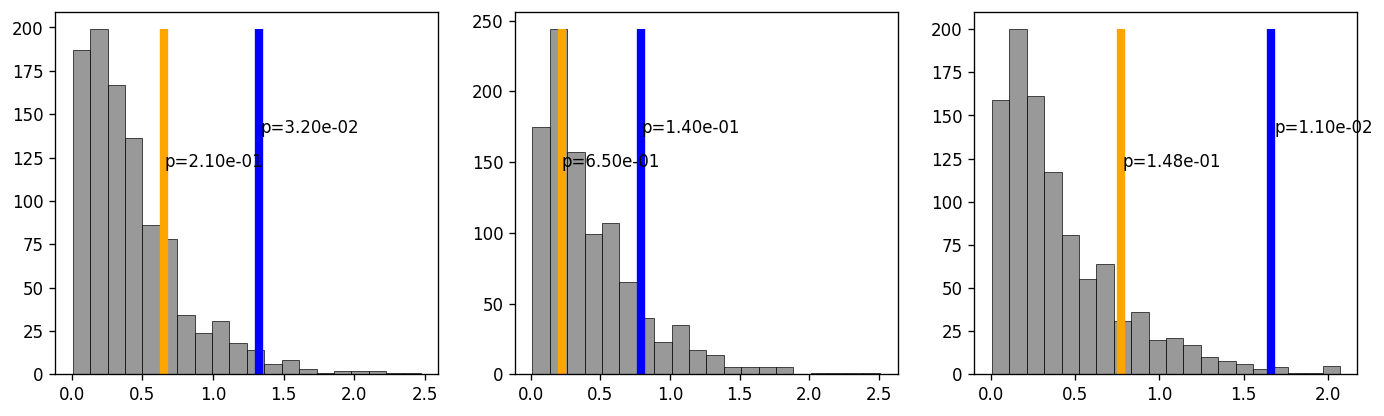

In [80]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, dpi=120, figsize=(14,4))
n, bins, patches = ax1.hist(subsib_positive_q, bins=20, histtype = "barstacked", align="mid", 
                          facecolor="grey", alpha=0.8, label="subsampled sib", edgecolor="black", 
                          linewidth=0.5)
Z1, P1 = GetPermutationP(subsib_positive_q, asd_positive_q)
Z2, P2 = GetPermutationP(subsib_positive_q, sib_positive_q)
ax1.vlines(asd_positive_q, ymin=0, ymax = max(n), linewidth = 5, color="blue", label="ASD")
ax1.vlines(sib_positive_q, ymin=0, ymax = max(n), linewidth = 5, color="orange", label="Sib")
ax1.text(x=asd_positive_q*1.01, y=max(n)*0.7, s = "p=%.2e"%P1)
ax1.text(x=sib_positive_q*1.01, y=max(n)*0.6, s = "p=%.2e"%P2)

n, bins, patches = ax2.hist(subsib_positive_q_short, bins=20, histtype = "barstacked", align="mid", 
                          facecolor="grey", alpha=0.8, label="subsampled sib", edgecolor="black", 
                          linewidth=0.5)
Z1, P1 = GetPermutationP(subsib_positive_q_short, asd_positive_q_short)
Z2, P2 = GetPermutationP(subsib_positive_q_short, sib_positive_q_short)
ax2.vlines(asd_positive_q_short, ymin=0, ymax = max(n), linewidth = 5, color="blue", label="ASD")
ax2.vlines(sib_positive_q_short, ymin=0, ymax = max(n), linewidth = 5, color="orange", label="Sib")
ax2.text(x=asd_positive_q_short*1.01, y=max(n)*0.7, s = "p=%.2e"%P1)
ax2.text(x=sib_positive_q_short*1.01, y=max(n)*0.6, s = "p=%.2e"%P2)

n, bins, patches = ax3.hist(subsib_positive_q_long, bins=20, histtype = "barstacked", align="mid", 
                          facecolor="grey", alpha=0.8, label="subsampled sib", edgecolor="black", 
                          linewidth=0.5)
Z1, P1 = GetPermutationP(subsib_positive_q_long, asd_positive_q_long)
Z2, P2 = GetPermutationP(subsib_positive_q_long, sib_positive_q_long)
ax3.vlines(asd_positive_q_long, ymin=0, ymax = max(n), linewidth = 5, color="blue", label="ASD")
ax3.vlines(sib_positive_q_long, ymin=0, ymax = max(n), linewidth = 5, color="orange", label="Sib")
ax3.text(x=asd_positive_q_long*1.01, y=max(n)*0.7, s = "p=%.2e"%P1)
ax3.text(x=sib_positive_q_long*1.01, y=max(n)*0.6, s = "p=%.2e"%P2)

ax.set_xlabel("Mean -log10(P_si) ")
plt.show()

##### Load precompute P mat

In [90]:
npys = []
for i in range(0, 10000, 1000):
    fil = "../scripts/SI.All_{}.npy".format(i)
    npy = np.load(fil)
    npys.append(npy)
SI_ALL_P = np.concatenate(npys)

npys = []
for i in range(0, 10000, 1000):
    fil = "../scripts/SI.Short_{}.npy".format(i)
    npy = np.load(fil)
    npys.append(npy)
SI_Short_P = np.concatenate(npys) 

npys = []
for i in range(0, 10000, 1000):
    fil = "../scripts/SI.Long_{}.npy".format(i)
    npy = np.load(fil)
    npys.append(npy)
SI_Long_P = np.concatenate(npys)

In [91]:
subsib_positive_q = []
subsib_positive_q_short = []
subsib_positive_q_long = []
for df, p, p_short, p_long in zip(subsibDFs[:10000], SI_ALL_P, SI_Short_P, SI_Long_P):
    mean_q = GetMeanLogP_Positive(df, p)
    mean_q1 = GetMeanLogP_Positive(df, p_short)
    mean_q2 = GetMeanLogP_Positive(df, p_long)
    subsib_positive_q.append(mean_q)
    subsib_positive_q_short.append(mean_q1)
    subsib_positive_q_long.append(mean_q2)
subsib_positive_q = np.array(subsib_positive_q)
subsib_positive_q_short = np.array(subsib_positive_q_short)
subsib_positive_q_long = np.array(subsib_positive_q_long)

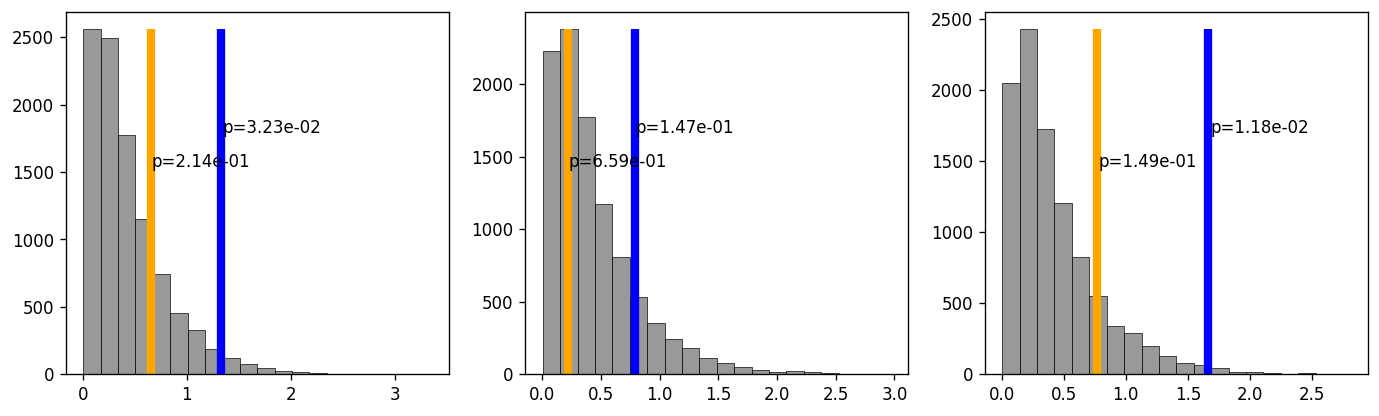

In [92]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, dpi=120, figsize=(14,4))
n, bins, patches = ax1.hist(subsib_positive_q, bins=20, histtype = "barstacked", align="mid", 
                          facecolor="grey", alpha=0.8, label="subsampled sib", edgecolor="black", 
                          linewidth=0.5)
Z1, P1 = GetPermutationP(subsib_positive_q, asd_positive_q)
Z2, P2 = GetPermutationP(subsib_positive_q, sib_positive_q)
ax1.vlines(asd_positive_q, ymin=0, ymax = max(n), linewidth = 5, color="blue", label="ASD")
ax1.vlines(sib_positive_q, ymin=0, ymax = max(n), linewidth = 5, color="orange", label="Sib")
ax1.text(x=asd_positive_q*1.01, y=max(n)*0.7, s = "p=%.2e"%P1)
ax1.text(x=sib_positive_q*1.01, y=max(n)*0.6, s = "p=%.2e"%P2)

n, bins, patches = ax2.hist(subsib_positive_q_short, bins=20, histtype = "barstacked", align="mid", 
                          facecolor="grey", alpha=0.8, label="subsampled sib", edgecolor="black", 
                          linewidth=0.5)
Z1, P1 = GetPermutationP(subsib_positive_q_short, asd_positive_q_short)
Z2, P2 = GetPermutationP(subsib_positive_q_short, sib_positive_q_short)
ax2.vlines(asd_positive_q_short, ymin=0, ymax = max(n), linewidth = 5, color="blue", label="ASD")
ax2.vlines(sib_positive_q_short, ymin=0, ymax = max(n), linewidth = 5, color="orange", label="Sib")
ax2.text(x=asd_positive_q_short*1.01, y=max(n)*0.7, s = "p=%.2e"%P1)
ax2.text(x=sib_positive_q_short*1.01, y=max(n)*0.6, s = "p=%.2e"%P2)

n, bins, patches = ax3.hist(subsib_positive_q_long, bins=20, histtype = "barstacked", align="mid", 
                          facecolor="grey", alpha=0.8, label="subsampled sib", edgecolor="black", 
                          linewidth=0.5)
Z1, P1 = GetPermutationP(subsib_positive_q_long, asd_positive_q_long)
Z2, P2 = GetPermutationP(subsib_positive_q_long, sib_positive_q_long)
ax3.vlines(asd_positive_q_long, ymin=0, ymax = max(n), linewidth = 5, color="blue", label="ASD")
ax3.vlines(sib_positive_q_long, ymin=0, ymax = max(n), linewidth = 5, color="orange", label="Sib")
ax3.text(x=asd_positive_q_long*1.01, y=max(n)*0.7, s = "p=%.2e"%P1)
ax3.text(x=sib_positive_q_long*1.01, y=max(n)*0.6, s = "p=%.2e"%P2)

ax.set_xlabel("Mean -log10(P_si) ")
plt.show()

#### Test on Connectivity

In [45]:
topNs = np.arange(200, 5, -1)
DIR = "/home/jw3514/Work/ASD_Circuits/scripts"
ASD_Conn = np.load("{}/RankScores/RankConn.C.Ipsi.ASD.npy".format(DIR))
Cont_Conn = np.load("{}/RankScores/RankConn.C.Ipsi.Cont.npy".format(DIR))

ASD_Conn_Short = np.load("{}/RankScores/RankConn.C.Ipsi.Short.3900.ASD.npy".format(DIR))
Cont_Conn_Short = np.load("{}/RankScores/RankConn.C.Ipsi.Short.3900.Cont.npy".format(DIR))

ASD_Conn_Long = np.load("{}/RankScores/RankConn.C.Ipsi.Long.3900.ASD.npy".format(DIR))
Cont_Conn_Long = np.load("{}/RankScores/RankConn.C.Ipsi.Long.3900.Cont.npy".format(DIR))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot: >

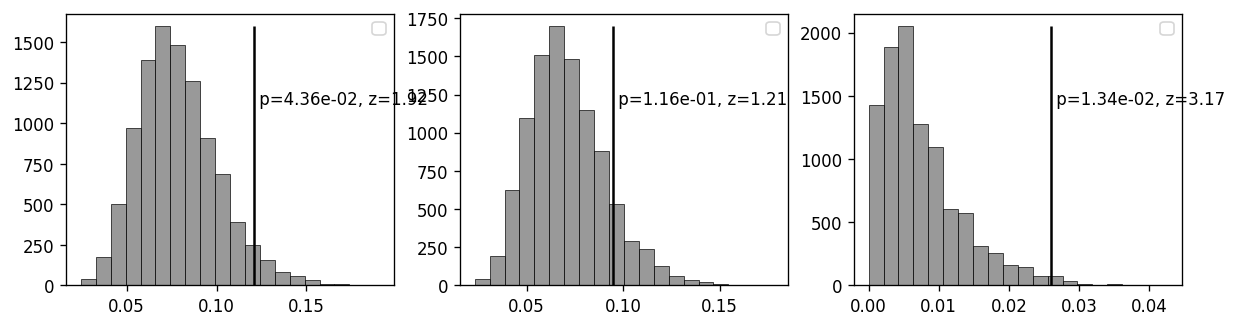

In [51]:
idx = np.where(topNs==46)[0][0]
#print(idx)
fig, axs = plt.subplots(1, 3, dpi=120, figsize=(12,3))
PlotPermutationP(Cont_Conn[:, idx], ASD_Conn[idx], axs[0])
PlotPermutationP(Cont_Conn_Short[:, idx], ASD_Conn_Short[idx], axs[1])
PlotPermutationP(Cont_Conn_Long[:, idx], ASD_Conn_Long[idx], axs[2])

In [1]:
0.05/42

0.0011904761904761906

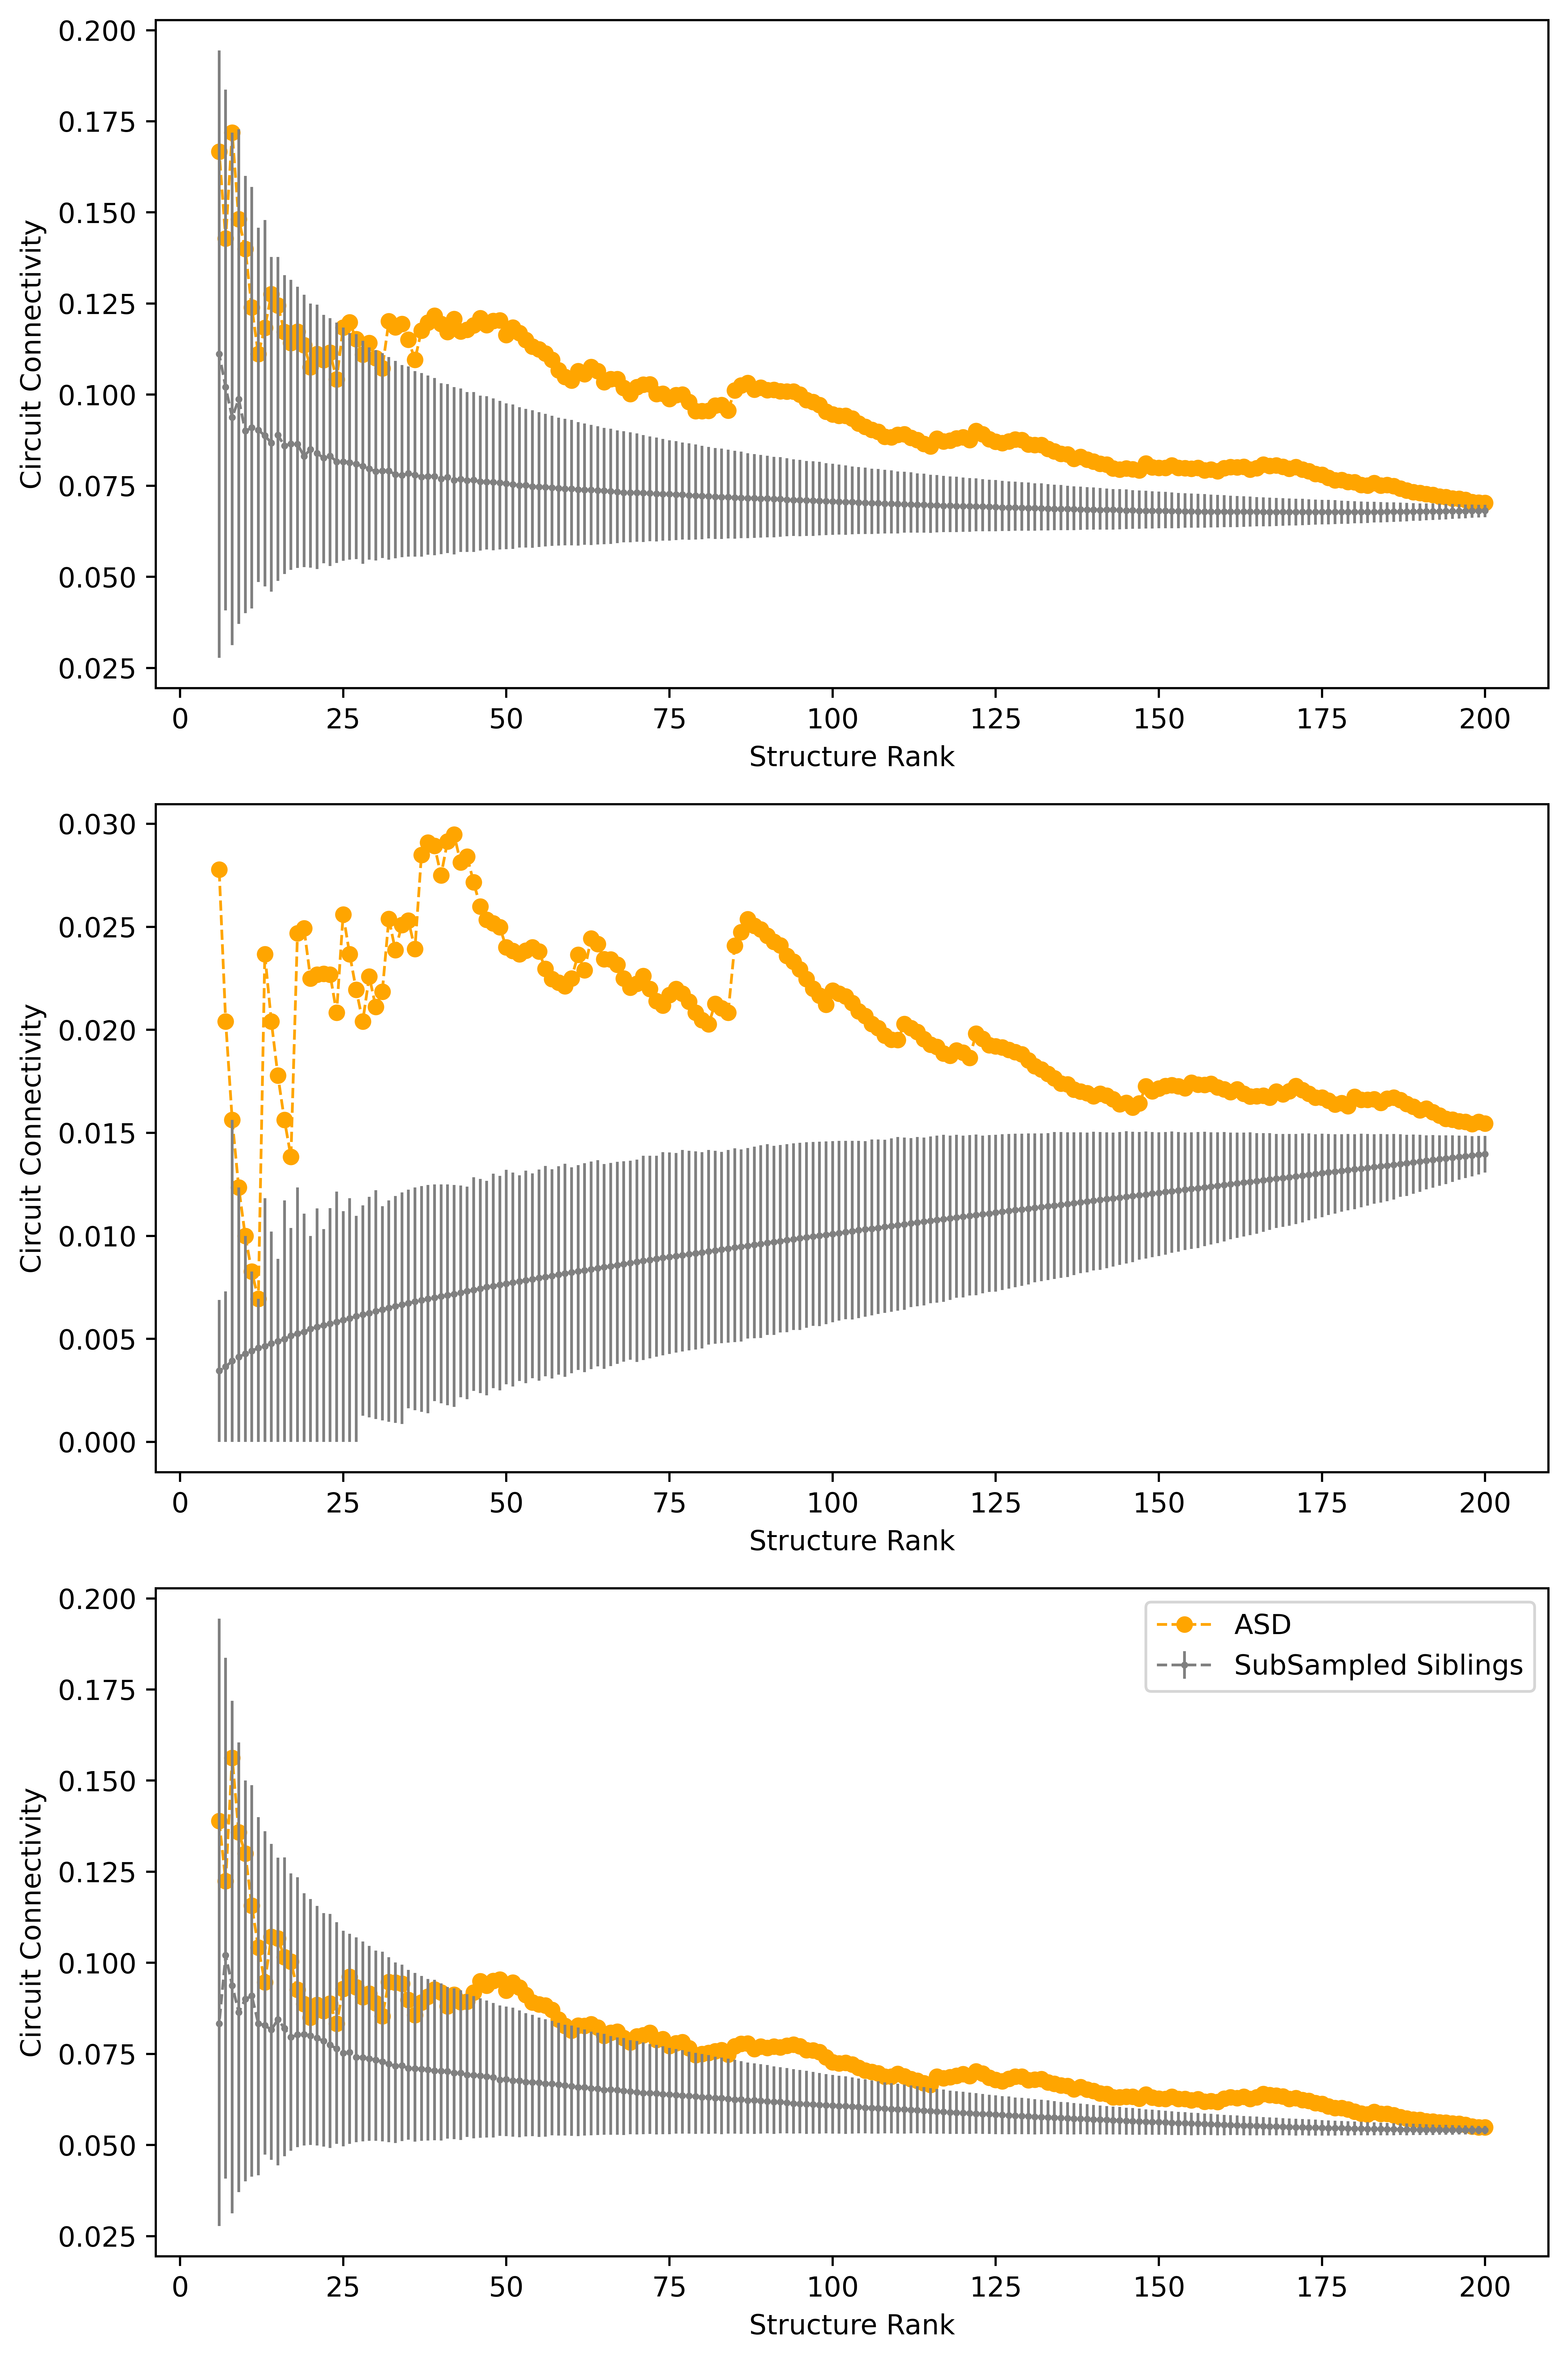

In [156]:
import matplotlib.backends.backend_pdf

BarLen = 34.1
#BarLen = 47.5

fig, (ax1, ax2, ax3) = plt.subplots(3,1, dpi=720, figsize=(8,12))

cont = np.median(Cont_Conn, axis=0)
ax1.plot(topNs, ASD_Conn, color="orange", marker="o", markersize=5, lw=1,
                     ls="dashed", label="ASD")
lower = np.percentile(Cont_Conn, 50-BarLen, axis=0)
upper = np.percentile(Cont_Conn, 50+BarLen, axis=0)
ax1.errorbar(topNs, cont, color="grey", marker="o", markersize=1.5, lw=1,
            yerr=(cont - lower, upper - cont ), ls="dashed", label="SubSampled Siblings")
ax1.set_xlabel("Structure Rank")
ax1.set_ylabel("Circuit Connectivity")

cont = np.nanmean(Cont_Conn_Long, axis=0)
ax2.plot(topNs, ASD_Conn_Long, color="orange", marker="o", markersize=5, lw=1,
                     ls="dashed", label="ASD")
lower = np.nanpercentile(Cont_Conn_Long, 50-BarLen, axis=0)
upper = np.nanpercentile(Cont_Conn_Long, 50+BarLen, axis=0)
ax2.errorbar(topNs, cont, color="grey", marker="o", markersize=1.5, lw=1,
            yerr=(cont - lower, abs(upper - cont) ), ls="dashed", label="SubSampled Siblings")
ax2.set_xlabel("Structure Rank")
ax2.set_ylabel("Circuit Connectivity")

cont = np.median(Cont_Conn_Short, axis=0)
ax3.plot(topNs, ASD_Conn_Short, color="orange", marker="o", markersize=5, lw=1,
                     ls="dashed", label="ASD")
lower = np.percentile(Cont_Conn_Short, 50-BarLen, axis=0)
upper = np.percentile(Cont_Conn_Short, 50+BarLen, axis=0)
ax3.errorbar(topNs, cont, color="grey", marker="o", markersize=1.5, lw=1,
            yerr=(cont - lower, upper - cont ), ls="dashed", label="SubSampled Siblings")
ax3.set_xlabel("Structure Rank")
ax3.set_ylabel("Circuit Connectivity")

#fig.text(0.5, -0.03, 'Structure Ranks', ha='center')
#fig.text(-0.03, 0.5, 'SI Score', va='center', rotation='vertical')
plt.tight_layout()
plt.legend()

In [53]:
Conn_Cont_P = []
for profile in Cont_Conn[:1000]:
    pvalues = np.array([GetPermutationP(Cont_Conn[:, i], profile[i])[1] for i in range(
        profile.shape[0])])
    Conn_Cont_P.append(pvalues)
Conn_Cont_P = np.array(Conn_Cont_P)

In [54]:
Conn_Cont_Short_P = []
for profile in Cont_Conn_Short[:1000]:
    pvalues = np.array([GetPermutationP(Cont_Conn_Short[:, i], profile[i])[1] for i in range(
        profile.shape[0])])
    Conn_Cont_Short_P.append(pvalues)
Conn_Cont_Short_P = np.array(Conn_Cont_Short_P)

Conn_Cont_Long_P = []
for profile in Cont_Conn_Long[:1000]:
    pvalues = np.array([GetPermutationP(Cont_Conn_Long[:, i], profile[i])[1] for i in range(
        profile.shape[0])])
    Conn_Cont_Long_P.append(pvalues)
Conn_Cont_Long_P = np.array(Conn_Cont_Long_P)

In [70]:
asd_pvalues = np.array([GetPermutationP(Cont_Conn[:, i], ASD_Conn[i])[1] for i in range(
        ASD_Conn.shape[0])])
asd_short_pvalues = np.array([GetPermutationP(Cont_Conn_Short[:, i], ASD_Conn_Short[i])[1] for i in range(
        ASD_Conn_Short.shape[0])])
asd_long_pvalues = np.array([GetPermutationP(Cont_Conn_Long[:, i], ASD_Conn_Long[i])[1] for i in range(
        ASD_Conn_Long.shape[0])])
asd_positive_q = GetMeanLogP_Positive(ASD_DF, asd_pvalues)
asd_positive_q_short = GetMeanLogP_Positive(ASD_DF, asd_short_pvalues)
asd_positive_q_long = GetMeanLogP_Positive(ASD_DF, asd_long_pvalues)

In [93]:
npys = []
for i in range(0, 10000, 1000):
    fil = "../scripts/Conn.All_{}.npy".format(i)
    npy = np.load(fil)
    npys.append(npy)
Conn_ALL_P = np.concatenate(npys)

npys = []
for i in range(0, 10000, 1000):
    fil = "../scripts/Conn.Short_{}.npy".format(i)
    npy = np.load(fil)
    npys.append(npy)
Conn_Short_P = np.concatenate(npys) 

npys = []
for i in range(0, 10000, 1000):
    fil = "../scripts/Conn.Long_{}.npy".format(i)
    npy = np.load(fil)
    npys.append(npy)
Conn_Long_P = np.concatenate(npys)

In [94]:
subsib_positive_q = []
subsib_positive_q_short = []
subsib_positive_q_long = []
for df, p, p_short, p_long in zip(subsibDFs, Conn_ALL_P, Conn_Short_P, Conn_Long_P):
    mean_q = GetMeanLogP_Positive(df, p)
    mean_q1 = GetMeanLogP_Positive(df, p_short)
    mean_q2 = GetMeanLogP_Positive(df, p_long)
    subsib_positive_q.append(mean_q)
    subsib_positive_q_short.append(mean_q1)
    subsib_positive_q_long.append(mean_q2)
subsib_positive_q = np.array(subsib_positive_q)
subsib_positive_q_short = np.array(subsib_positive_q_short)
subsib_positive_q_long = np.array(subsib_positive_q_long)

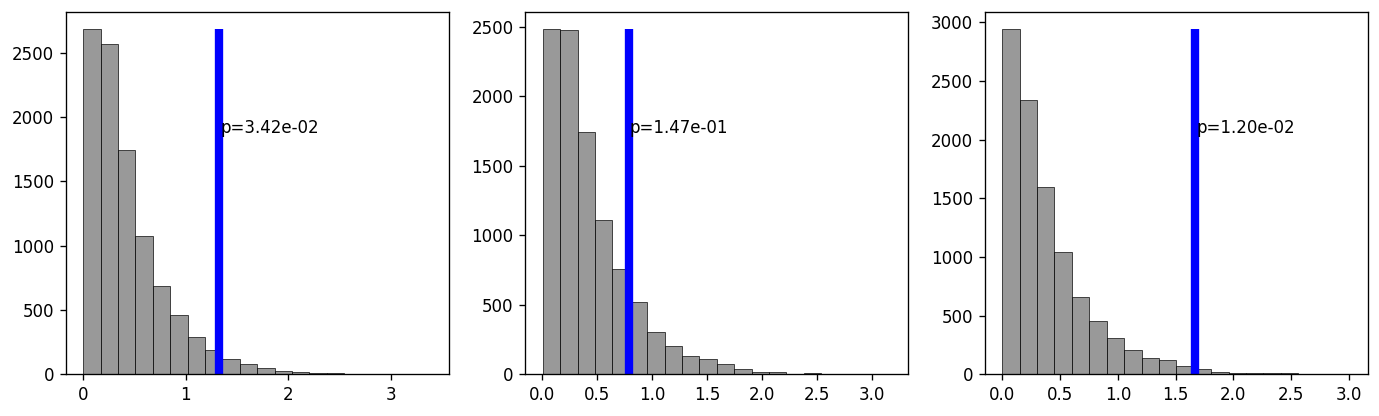

In [95]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, dpi=120, figsize=(14,4))
n, bins, patches = ax1.hist(subsib_positive_q, bins=20, histtype = "barstacked", align="mid", 
                          facecolor="grey", alpha=0.8, label="subsampled sib", edgecolor="black", 
                          linewidth=0.5)
Z1, P1 = GetPermutationP(subsib_positive_q, asd_positive_q)
ax1.vlines(asd_positive_q, ymin=0, ymax = max(n), linewidth = 5, color="blue", label="ASD")
ax1.text(x=asd_positive_q*1.01, y=max(n)*0.7, s = "p=%.2e"%P1)

n, bins, patches = ax2.hist(subsib_positive_q_short, bins=20, histtype = "barstacked", align="mid", 
                          facecolor="grey", alpha=0.8, label="subsampled sib", edgecolor="black", 
                          linewidth=0.5)
Z1, P1 = GetPermutationP(subsib_positive_q_short, asd_positive_q_short)
ax2.vlines(asd_positive_q_short, ymin=0, ymax = max(n), linewidth = 5, color="blue", label="ASD")
ax2.text(x=asd_positive_q_short*1.01, y=max(n)*0.7, s = "p=%.2e"%P1)

n, bins, patches = ax3.hist(subsib_positive_q_long, bins=20, histtype = "barstacked", align="mid", 
                          facecolor="grey", alpha=0.8, label="subsampled sib", edgecolor="black", 
                          linewidth=0.5)
Z1, P1 = GetPermutationP(subsib_positive_q_long, asd_positive_q_long)
ax3.vlines(asd_positive_q_long, ymin=0, ymax = max(n), linewidth = 5, color="blue", label="ASD")
ax3.text(x=asd_positive_q_long*1.01, y=max(n)*0.7, s = "p=%.2e"%P1)

ax.set_xlabel("Mean -log10(P_si) ")
plt.show()

#### Test on mean SI score

In [98]:
asd_mean_si = np.mean(ASD_SI)
sib_mean_si = np.mean(sib_topN_score)
subsib_mean_si = []
for profile in Cont_SI:
    mean_q = np.mean(profile)
    subsib_mean_si.append(mean_q)
subsib_mean_si = np.array(subsib_mean_si)

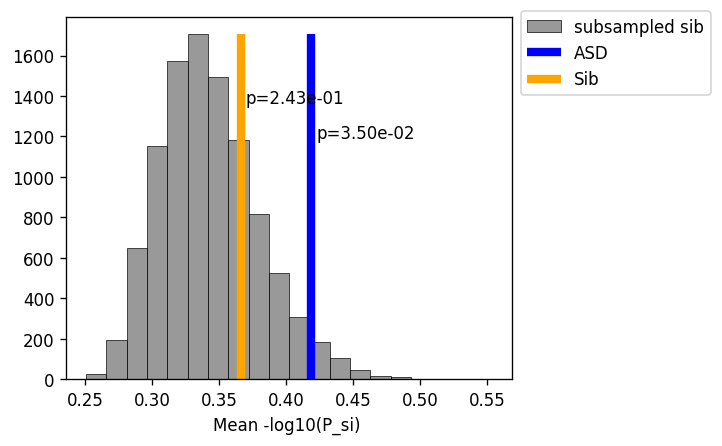

In [100]:
fig, ax = plt.subplots(dpi=120)
n, bins, patches = ax.hist(subsib_mean_si, bins=20, histtype = "barstacked", align="mid", 
                          facecolor="grey", alpha=0.8, label="subsampled sib", edgecolor="black", 
                          linewidth=0.5)
Z1, P1 = GetPermutationP(subsib_mean_si, asd_mean_si)
Z2, P2 = GetPermutationP(subsib_mean_si, sib_mean_si)
ax.vlines(asd_mean_si, ymin=0, ymax = max(n), linewidth = 5, color="blue", label="ASD")
ax.vlines(sib_mean_si, ymin=0, ymax = max(n), linewidth = 5, color="orange", label="Sib")
ax.text(x=asd_mean_si*1.01, y=max(n)*0.7, s = "p=%.2e"%P1)
ax.text(x=sib_mean_si*1.01, y=max(n)*0.8, s = "p=%.2e"%P2)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc="center left", bbox_to_anchor=(1, 0.9))
ax.set_xlabel("Mean -log10(P_si) ")
plt.show()

In [76]:
Cont_SI[:100].shape

(100, 195)

In [77]:
Cont_P = []
for profile in Cont_SI:
    pvalues = np.array([GetPermutationP(Cont_SI[:, i], profile[i])[1] for i in range(
        profile.shape[0])])
    Cont_P.append(pvalues)
Cont_P = np.array(Cont_P)

In [78]:
Cont_P.shape

(10000, 195)

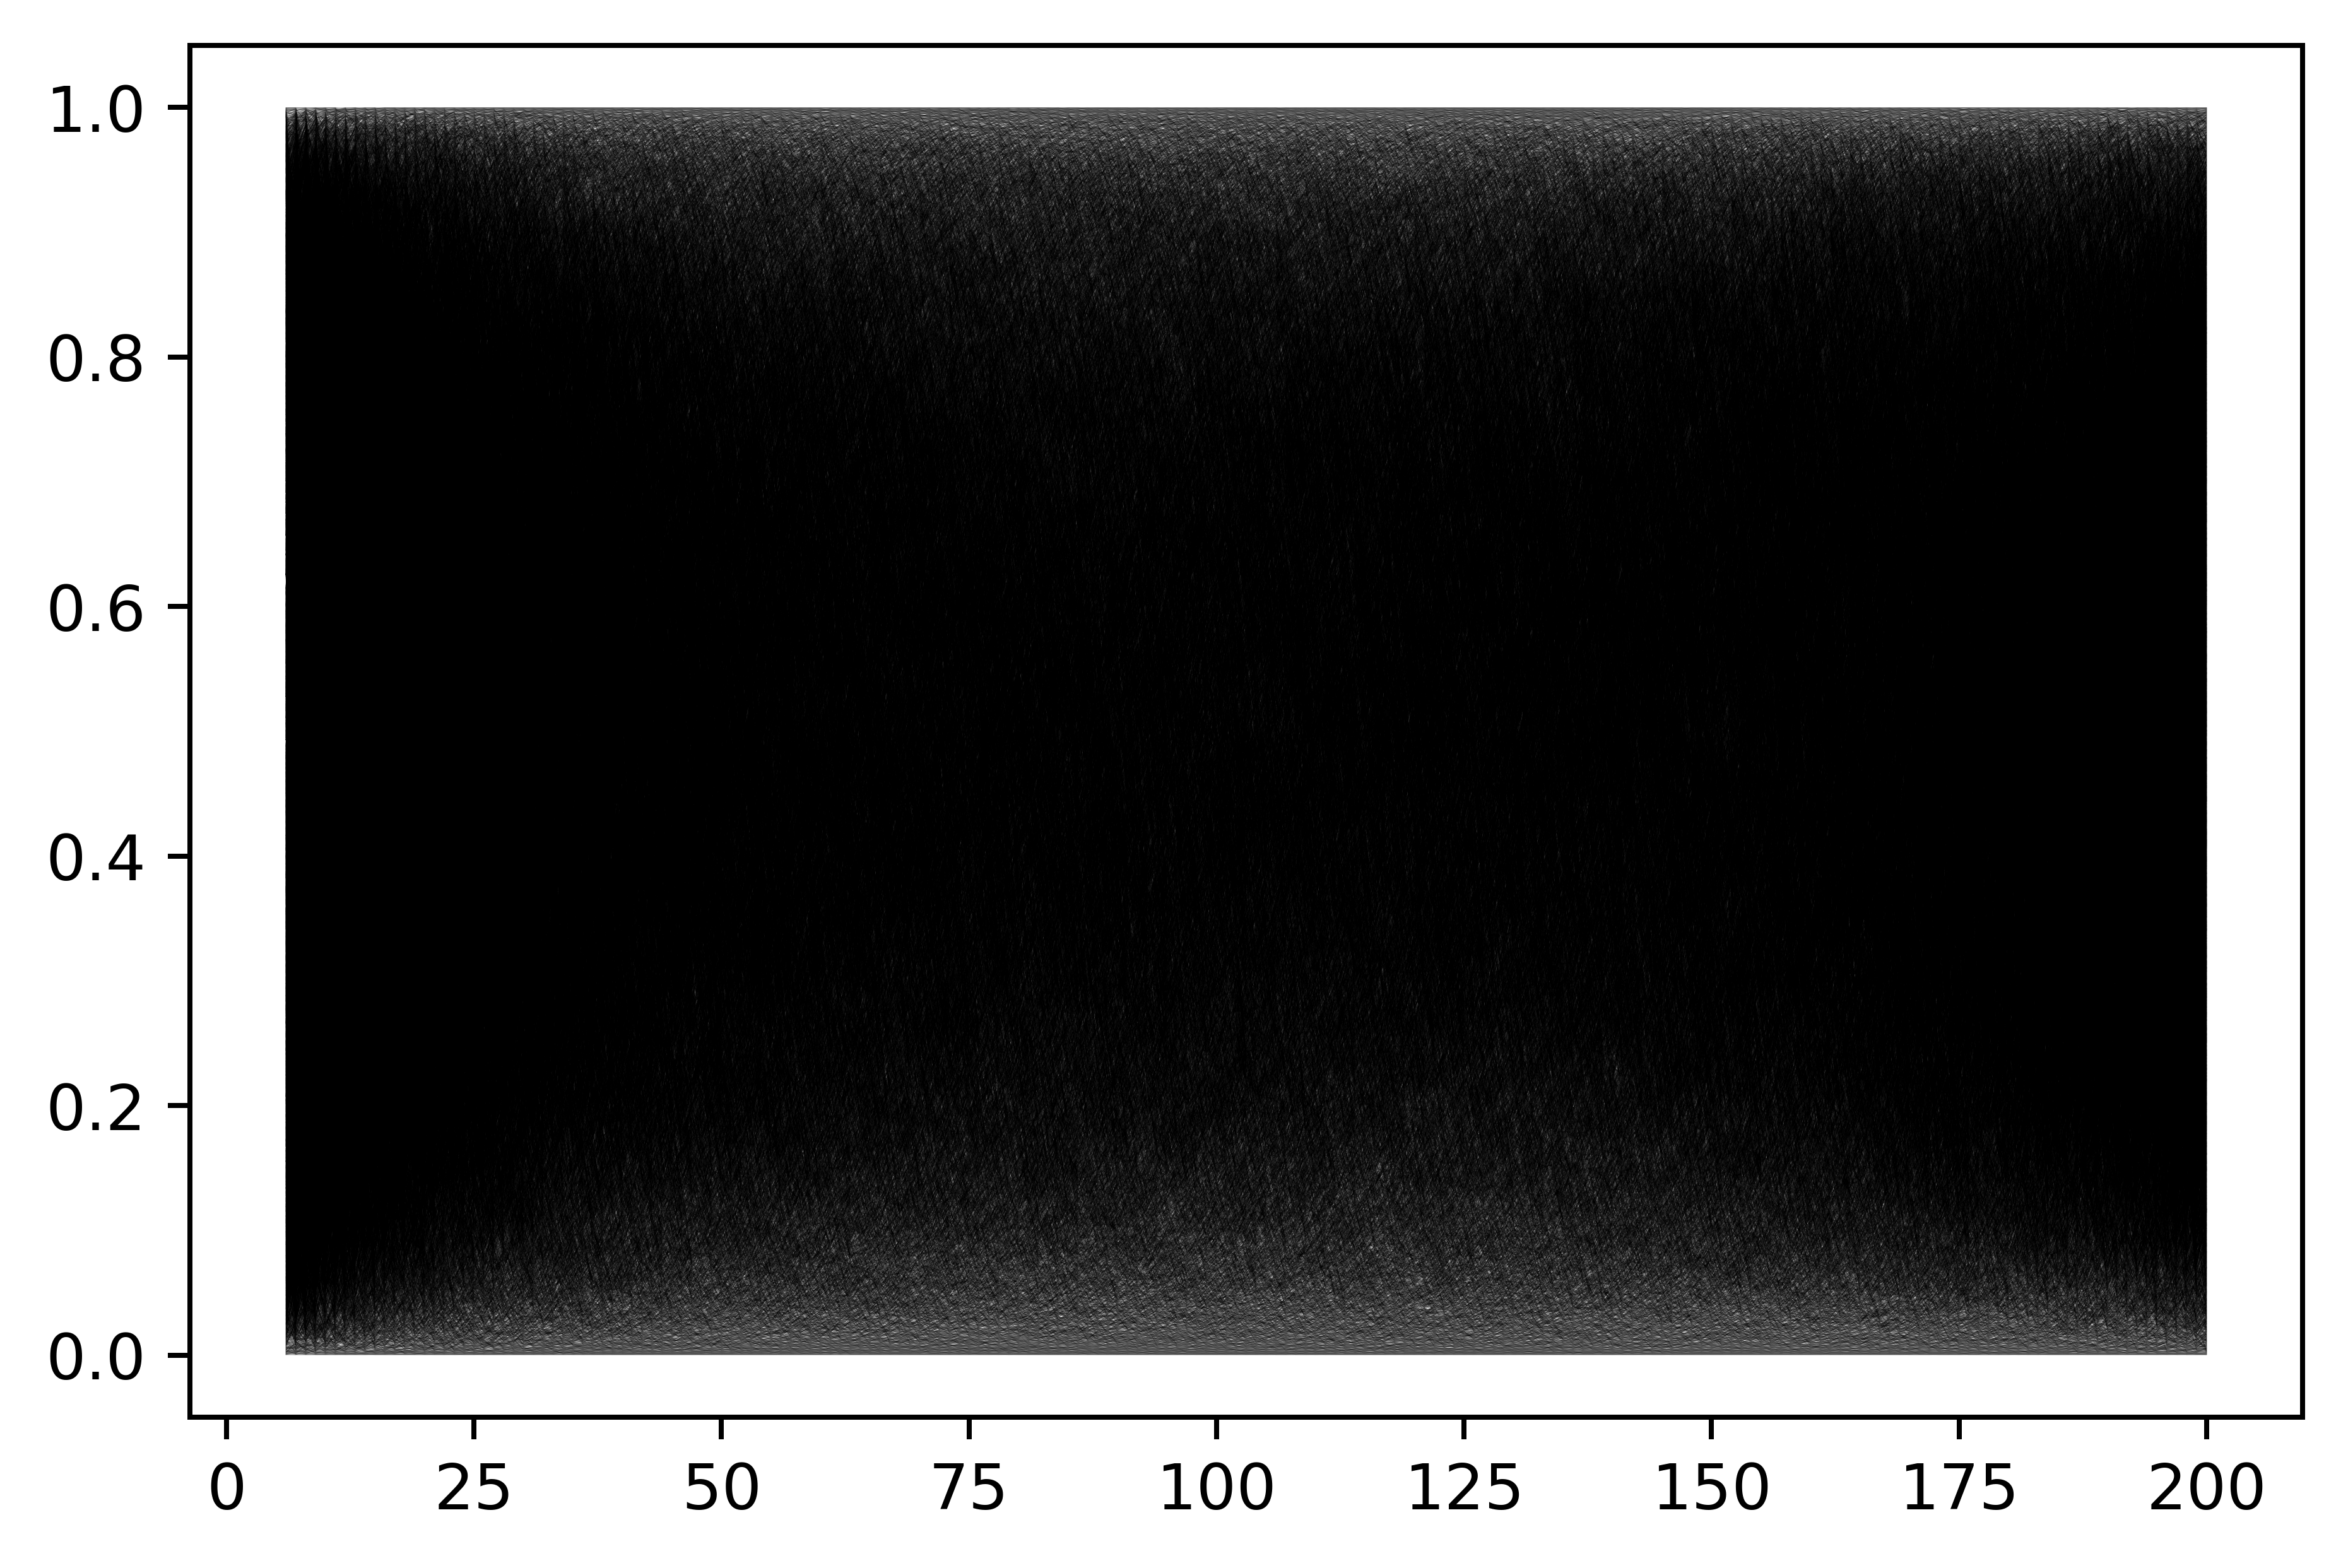

In [79]:
plt.figure(dpi=720)
plt.plot(topNs, Cont_P.T, color="black", alpha=0.2, linewidth=0.1)
plt.show()

<BarContainer object of 195 artists>

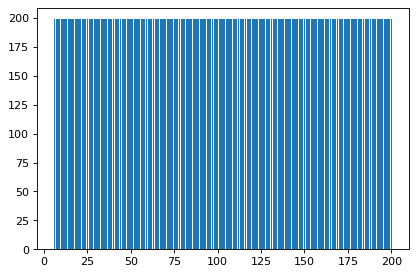

In [80]:
dat = []
for i in range(Cont_P.shape[1]):
    tmp = Cont_P[:, i]
    sigP = tmp[tmp<0.02]
    dat.append(len(sigP))
plt.bar(topNs, dat)

In [60]:
print(len(dat))
print(len(topNs))

195
195


In [31]:
Cont_P.shape
def picksize(size, Cont_P=Cont_P, topNs=topNs):
    idx = np.where(topNs == size)[0][0]
    return Cont_P[:, idx]

In [48]:
pvalues_10 = picksize(10)
pvalues_100 = picksize(100)
pvalues_200 = picksize(200)

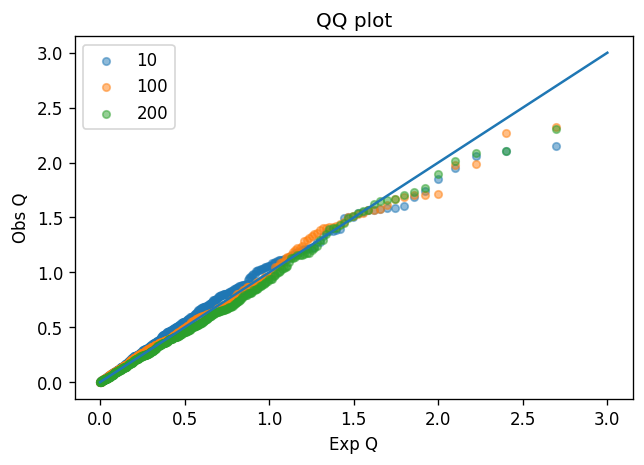

In [49]:
QQplot([pvalues_10, pvalues_100, pvalues_200], ["10", "100", "200"])

Text(0, 0.5, 'size 100')

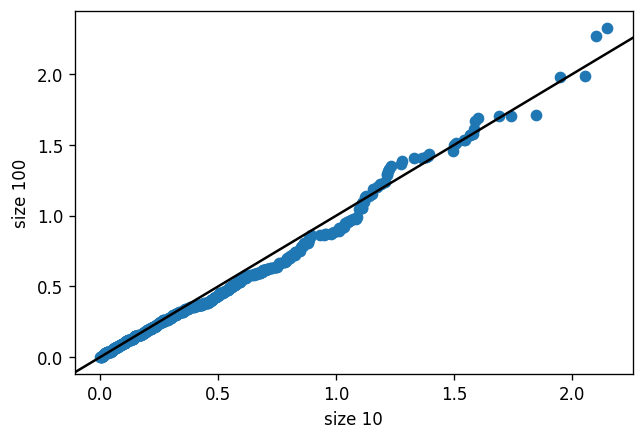

In [46]:
fig, ax = plt.subplots(dpi=120)
ax.scatter(-np.log10(sorted(pvalues_10)), -np.log10(sorted(pvalues_100)))
ax.axline((0, 0), slope=1, color="black")
ax.set_xlabel("size 10")
ax.set_ylabel("size 100")

In [67]:
size_sig = []
smallest_P = []
for pvalues in Cont_P:
    #print(len(pvalues))
    idx = np.argmin(pvalues)
    size = topNs[idx]
    size_sig.append(size)
    smallest_P.append(pvalues[idx])

Text(0, 0.5, 'smallP')

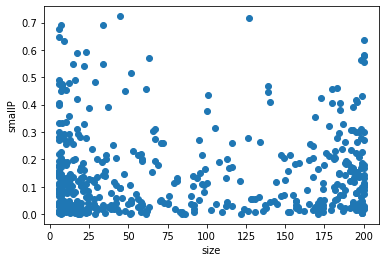

In [70]:
plt.scatter(size_sig, smallest_P)
plt.xlabel("size")
plt.ylabel("smallP")

(array([103.,  32.,  30.,  27.,  14.,  10.,   7.,   9.,   7.,   9.,  11.,
          6.,   6.,   5.,   3.,   5.,   3.,   7.,   8.,   4.,   3.,   4.,
          6.,   2.,   4.,   4.,   3.,   6.,   3.,   5.,   6.,   7.,   5.,
          6.,  17.,   7.,  18.,  13.,  25.,  50.]),
 array([  6.  ,  10.85,  15.7 ,  20.55,  25.4 ,  30.25,  35.1 ,  39.95,
         44.8 ,  49.65,  54.5 ,  59.35,  64.2 ,  69.05,  73.9 ,  78.75,
         83.6 ,  88.45,  93.3 ,  98.15, 103.  , 107.85, 112.7 , 117.55,
        122.4 , 127.25, 132.1 , 136.95, 141.8 , 146.65, 151.5 , 156.35,
        161.2 , 166.05, 170.9 , 175.75, 180.6 , 185.45, 190.3 , 195.15,
        200.  ]),
 <BarContainer object of 40 artists>)

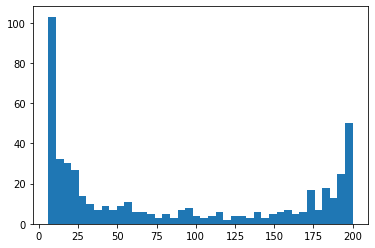

In [66]:
plt.hist(size_sig, bins=40)

# Other

In [ ]:
topN = 100

top_strs_asd = ASD_DF.head(topN).index.values
top_strs_sib = Sib_DF.head(topN).index.values
ASD_SCore = ScoreCircuit_SI_Joint(top_strs_asd, InfoMat)
Sib_Score = ScoreCircuit_SI_Joint(top_strs_sib, InfoMat)
ASD_SCoreLong = ScoreCircuit_SI_Joint(top_strs_asd, InfoMatLong)
Sib_ScoreLong = ScoreCircuit_SI_Joint(top_strs_sib, InfoMatLong)
ASD_SCoreShort = ScoreCircuit_SI_Joint(top_strs_asd, InfoMatShort)
Sib_ScoreShort = ScoreCircuit_SI_Joint(top_strs_sib, InfoMatShort)

Cont_Scores = []
Cont_ScoresLong = []
Cont_ScoresShort = []
for file in os.listdir(Control_DIR):
    if file.startswith("cont.genes"):
        continue
    df = pd.read_csv(Control_DIR+file, index_col="STR")
    top_strs = df.head(topN).index.values
    cont_score = ScoreCircuit_SI_Joint(top_strs, InfoMat)
    cont_scoreLong = ScoreCircuit_SI_Joint(top_strs, InfoMatLong)
    cont_scoreShort = ScoreCircuit_SI_Joint(top_strs, InfoMatShort)
    Cont_Scores.append(cont_score)
    Cont_ScoresLong.append(cont_scoreLong)
    Cont_ScoresShort.append(cont_scoreShort)
Cont_Scores = np.array(Cont_Scores)
Cont_ScoresLong = np.array(Cont_ScoresLong)
Cont_ScoresShort = np.array(Cont_ScoresShort)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)
PlotPermutationP(Cont_Scores, ASD_SCore, ax1)
PlotPermutationP(Cont_Scores, Sib_Score, ax2)
plt.tight_layout()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)
PlotPermutationP(Cont_ScoresLong, ASD_SCoreLong, ax1)
PlotPermutationP(Cont_ScoresLong, Sib_ScoreLong, ax2)
plt.tight_layout()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)
PlotPermutationP(Cont_ScoresShort, ASD_SCoreShort, ax1)
PlotPermutationP(Cont_ScoresShort, Sib_ScoreShort, ax2)
plt.tight_layout()

### XX

In [ ]:
topNs = np.arange(200, 5, -1)
DIR = "/home/jw3514/Work/ASD_Circuits/scripts"
ASD_Distance = np.load("{}/RankScore.Ipsi.ASD.npy".format(DIR))
Cont_Distance = np.load("{}/RankScore.Ipsi.Cont.npy".format(DIR))

DIR = "/home/jw3514/Work/ASD_Circuits/scripts"
ASD_DistanceShort = np.load("{}/RankScore.Ipsi.Short.2600.ASD.npy".format(DIR))
Cont_DistanceShort = np.load("{}/RankScore.Ipsi.Short.2600.Cont.npy".format(DIR))

DIR = "/home/jw3514/Work/ASD_Circuits/scripts"
ASD_DistanceLong = np.load("{}/RankScore.Ipsi.Long.2600.ASD.npy".format(DIR))
Cont_DistanceLong = np.load("{}/RankScore.Ipsi.Long.2600.Cont.npy".format(DIR))

In [ ]:
sig_sizes = []
for profile in Cont_Distance:
    Pvalues = np.array([GetPermutationP(Cont_Distance[:, i], profile[i])[1] for i in range(
        profile.shape[0])])
    x = Pvalues[Pvalues<0.05].shape[0]
    sig_sizes.append(x)

In [ ]:
sig_sizes_long = []
for profile in Cont_DistanceLong:
    Pvalues = np.array([GetPermutationP(Cont_DistanceLong[:, i], profile[i])[1] for i in range(
        profile.shape[0])])
    x = Pvalues[Pvalues<0.05].shape[0]
    sig_sizes_long.append(x)

In [ ]:
sig_sizes_short = []
for profile in Cont_DistanceShort:
    Pvalues = np.array([GetPermutationP(Cont_DistanceShort[:, i], profile[i])[1] for i in range(
        profile.shape[0])])
    x = Pvalues[Pvalues<0.05].shape[0]
    sig_sizes_short.append(x)

In [ ]:
sig_sizes = np.array(sig_sizes)
plt.hist(sig_sizes)
plt.plot()
print(len(sig_sizes[sig_sizes>1]))
print(len(sig_sizes[sig_sizes>10]))

In [ ]:
sig_sizes_long = np.array(sig_sizes_long)
plt.hist(sig_sizes_long)
plt.plot()
print(len(sig_sizes_long[sig_sizes_long>1]))
print(len(sig_sizes_long[sig_sizes_long>10]))

In [ ]:
sig_sizes_short = np.array(sig_sizes_short)
plt.hist(sig_sizes_short)
plt.plot()
print(len(sig_sizes_short[sig_sizes_short>1]))
print(len(sig_sizes_short[sig_sizes_short>10]))
print(len(sig_sizes_short[sig_sizes_short>100]))

In [ ]:
2800/10000

In [ ]:
XXPs, peak_sizes = [], []
for profile in Cont_Distance:
    Pvalues = np.array([GetPermutationP(Cont_Distance[:, i], profile[i])[1] for i in range(
        profile.shape[0])])
    smallestP_idx = np.argmin(Pvalues)
    smallestP = Pvalues[smallestP_idx]
    peak = topNs[smallestP_idx]
    XXPs.append(smallestP)
    peak_sizes.append(peak)
XXPs = np.array(XXPs)
peak_sizes = np.array(peak_sizes)

In [ ]:
plt.hist(peak_sizes)
plt.title("size of smallest pvalues")

In [ ]:
plt.hist(peak_sizes[XXPs<0.05])
plt.title("size of smallest significant pvalues")

In [ ]:
XXPs_long, peak_sizes_long = [], []
for profile in Cont_DistanceLong[:1000]:
    Pvalues = np.array([GetPermutationP(Cont_DistanceLong[:, i], profile[i])[1] for i in range(
        profile.shape[0])])
    smallestP_idx = np.argmin(Pvalues)
    smallestP = Pvalues[smallestP_idx]
    peak = topNs[smallestP_idx]
    XXPs_long.append(smallestP)
    peak_sizes_long.append(peak)
XXPs_long = np.array(XXPs_long)
peak_sizes_long = np.array(peak_sizes_long)

In [ ]:
plt.hist(peak_sizes_long[XXPs_long<0.05])
plt.title("size of smallest significant pvalues")

In [ ]:
XXPs_short, peak_sizes_short = [], []
for profile in Cont_DistanceShort[:1000]:
    Pvalues = np.array([GetPermutationP(Cont_DistanceShort[:, i], profile[i])[1] for i in range(
        profile.shape[0])])
    smallestP_idx = np.argmin(Pvalues)
    smallestP = Pvalues[smallestP_idx]
    peak = topNs[smallestP_idx]
    XXPs_short.append(smallestP)
    peak_sizes_short.append(peak)
XXPs_short = np.array(XXPs_short)
peak_sizes_short = np.array(peak_sizes_short)

In [ ]:
plt.hist(peak_sizes_short[XXPs_short<0.05])
plt.title("size of smallest significant pvalues")